In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
dirs = ['/hpc/compgen/projects/nanoxog/raw/benchmark/verm',
        '/hpc/compgen/projects/nanoxog/raw/benchmark/wick',
        '/hpc/compgen/projects/nanoxog/raw/benchmark/jain']

plots_dir = '/hpc/compgen/users/mpages/babe/results/data/plots'
tables_dir = '/hpc/compgen/users/mpages/babe/results/data/tables'

In [58]:
df_list = list()
for d in dirs:
    for dd in os.listdir(d):
        rep_file = os.path.join(d, dd, 'segmentation_report.txt')
        if os.path.isfile(rep_file):
            df = pd.read_csv(rep_file, sep = '\t', header = None)
            df['dataset'] = dd
            df = df.rename(columns={0:'file', 1:'read_id', 2:'segmentation_result', 3:'align_st', 4:'align_nd', 5:'align_strand', 6:'align_chrom'})
            df_list.append(df)
        else:
            print(os.path.join(d, dd))

/hpc/compgen/projects/nanoxog/raw/benchmark/verm/tmp
/hpc/compgen/projects/nanoxog/raw/benchmark/verm/genomes
/hpc/compgen/projects/nanoxog/raw/benchmark/wick/tmp
/hpc/compgen/projects/nanoxog/raw/benchmark/wick/genomes
/hpc/compgen/projects/nanoxog/raw/benchmark/jain/README.md
/hpc/compgen/projects/nanoxog/raw/benchmark/jain/tmp
/hpc/compgen/projects/nanoxog/raw/benchmark/jain/genomes
/hpc/compgen/projects/nanoxog/raw/benchmark/jain/nanopore_human_data.tar


In [59]:
df_segmentation = pd.concat(df_list)
df_segmentation = df_segmentation.iloc[1:, :]
df_segmentation = df_segmentation.reset_index()

In [60]:
df_segmentation['species'] = df_segmentation.dataset.str.split('-').apply(lambda x: x[0])

# Dataset counts

In [61]:
counts_dict = {'dataset': list(), 'Outcome': list(), 'counts': list()}
for dataset in np.unique(df_segmentation['dataset']):
    temp_df = df_segmentation[df_segmentation['dataset'] == dataset]
    counts_dict['dataset'].append(dataset)
    counts_dict['dataset'].append(dataset)
    counts_dict['Outcome'].append('Success')
    counts_dict['Outcome'].append('Fail')
    counts_dict['counts'].append(np.sum(temp_df['segmentation_result'] == 'Success'))
    counts_dict['counts'].append(np.sum(temp_df['segmentation_result'] != 'Success'))
df = pd.DataFrame(counts_dict)    

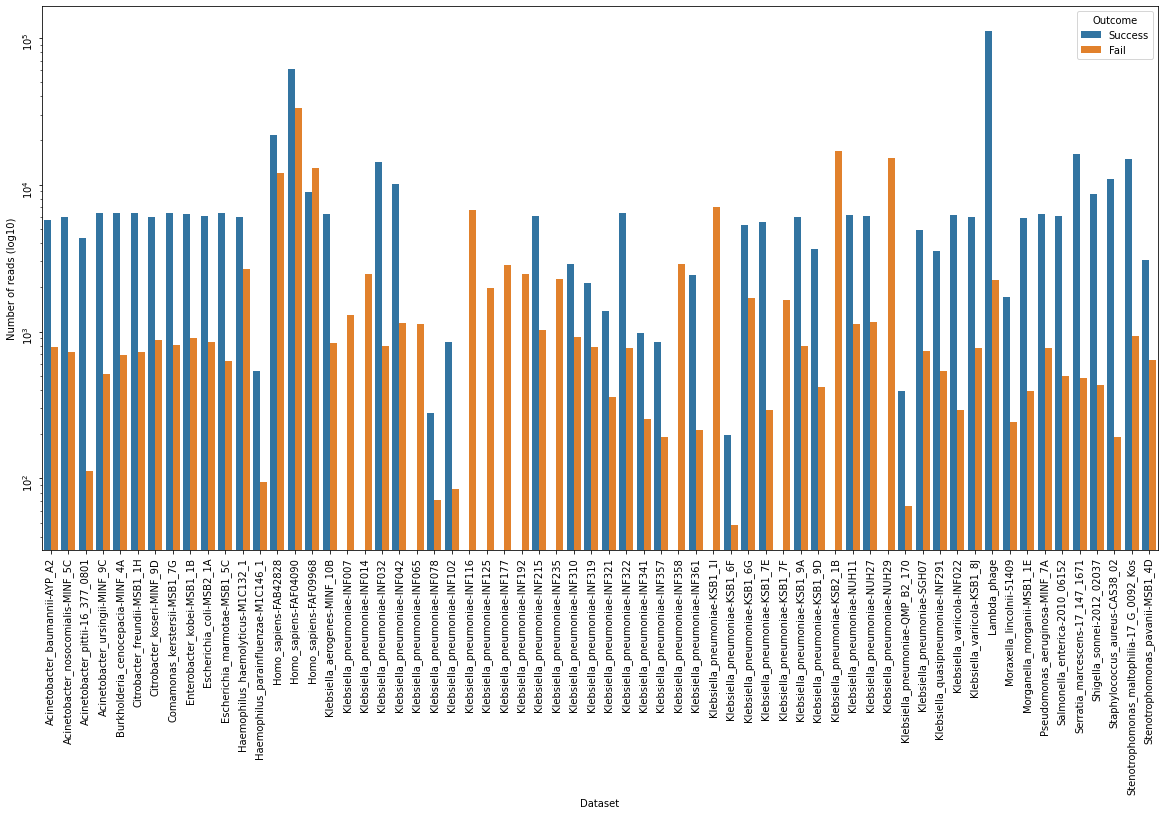

In [62]:
plot_file = os.path.join(plots_dir, 'dataset_reads_counts')

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = 'dataset', y = 'counts', hue = 'Outcome', data = df, ax = ax)
ax.tick_params(labelrotation=90)
ax.set_yscale('log')
ax.set_xlabel('Dataset')
ax.set_ylabel('Number of reads (log10)')

fig.savefig(plot_file + '.svg', transparent=True, dpi=200, bbox_inches="tight")
fig.savefig(plot_file + '.pdf', transparent=True, dpi=200, bbox_inches="tight")
fig.savefig(plot_file + '.png', facecolor='white', transparent=False, dpi=200, bbox_inches="tight")

In [63]:
df_save = df.pivot(index='dataset', columns='Outcome', values='counts')
df_save = df_save.reset_index().rename({'index':'Dataset'}, axis = 'columns')
df_save['total'] = df_save['Fail'] + df_save['Success']
df_save['sucess_perc'] = round((df_save['Success']/df_save['total'])*100, 1)
df_save['fail_perc'] = round((df_save['Fail']/df_save['total'])*100, 1)

df_save.to_csv(os.path.join(tables_dir, 'dataset_reads_counts.csv'), header = True, index = False)

# Species counts

In [64]:
counts_dict = {'species': list(), 'Outcome': list(), 'counts': list()}
for species in np.unique(df_segmentation['species']):
    temp_df = df_segmentation[df_segmentation['species'] == species]
    counts_dict['species'].append(species)
    counts_dict['species'].append(species)
    counts_dict['Outcome'].append('Success')
    counts_dict['Outcome'].append('Fail')
    counts_dict['counts'].append(np.sum(temp_df['segmentation_result'] == 'Success'))
    counts_dict['counts'].append(np.sum(temp_df['segmentation_result'] != 'Success'))
df = pd.DataFrame(counts_dict)    

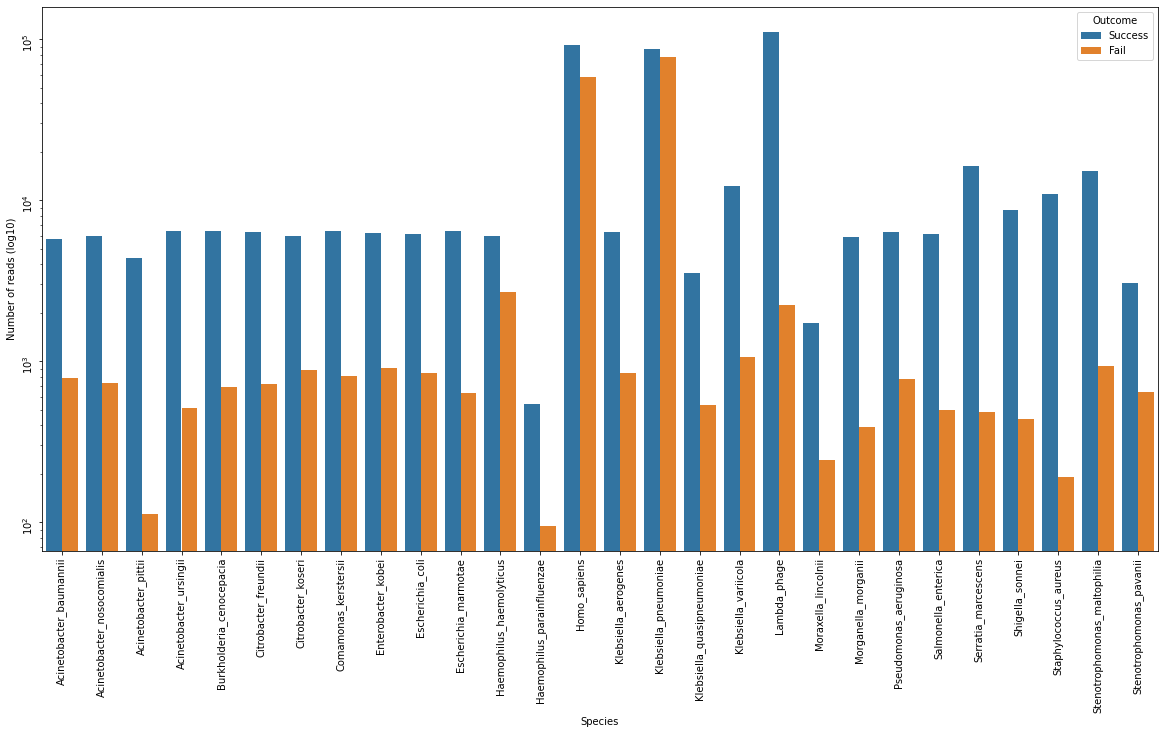

In [65]:
plot_file = os.path.join(plots_dir, 'species_reads_counts')

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = 'species', y = 'counts', hue = 'Outcome', data = df, ax = ax)
ax.tick_params(labelrotation=90)
ax.set_yscale('log')
ax.set_xlabel('Species')
ax.set_ylabel('Number of reads (log10)')

fig.savefig(plot_file + '.svg', transparent=True, dpi=200, bbox_inches="tight")
fig.savefig(plot_file + '.pdf', transparent=True, dpi=200, bbox_inches="tight")
fig.savefig(plot_file + '.png', facecolor='white', transparent=False, dpi=200, bbox_inches="tight")

In [66]:
df_save = df.pivot(index='species', columns='Outcome', values='counts')
df_save = df_save.reset_index().rename({'index':'Species'}, axis = 'columns')
df_save['total'] = df_save['Fail'] + df_save['Success']
df_save['sucess_perc'] = round((df_save['Success']/df_save['total'])*100, 1)
df_save['fail_perc'] = round((df_save['Fail']/df_save['total'])*100, 1)

df_save.to_csv(os.path.join(tables_dir, 'species_reads_counts.csv'), header = True, index = False)